# Multi-Asset Portfolio Optimization
* This is the implementation of the Modern Portfolio Theory, as known as the Mean-Variance Analysis, introduced by Economist Harry Markowitz.
* The objective is to optimize the expected return for a given level of risk in a portoflio, through adjusting the weights between the asset class inside.
* The model is merely the adoption of the theory and NOT an investment advice. Past performance does not guarantee future trends.

Please make sure you got the below packages before you start:

`!pip install numpy`

`!pip install yfinance`

`!pip install scipy`

`!pip install matplotlib`

Import packages.

In [1]:
import numpy as np
import yfinance as yf
from scipy.optimize import minimize
import matplotlib.pyplot as plt

Set the start date, end date and the stocks.

In [2]:
start_date = "2024-01-01"
end_date = "2024-06-30"

stocks = ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "META", "TSLA"]
stocks.sort()

In [3]:
stocks

['AAPL', 'AMZN', 'GOOGL', 'META', 'MSFT', 'NVDA', 'TSLA']

Extract the data from Yahoo Finance. We use the adjusted closing prices here.

In [4]:
data = yf.download(stocks, start=start_date, end=end_date)["Adj Close"]
data

[*********************100%***********************]  7 of 7 completed


Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
Date,,,,,,,
2024-01-02 00:00:00+00:00,184.938217,149.929993,137.828705,345.250488,368.854095,48.157665,248.419998
2024-01-03 00:00:00+00:00,183.553467,148.470001,138.576859,343.435944,368.585571,47.558792,238.449997
2024-01-04 00:00:00+00:00,181.222336,144.570007,136.053101,346.078003,365.940002,47.987705,237.929993
2024-01-05 00:00:00+00:00,180.495071,145.240005,135.394745,350.893524,365.751068,49.086464,237.490005
2024-01-08 00:00:00+00:00,184.858521,149.100006,138.497055,357.583374,372.653351,52.241787,240.449997
...,...,...,...,...,...,...,...
2024-06-24 00:00:00+00:00,207.899353,185.570007,178.982498,498.434509,446.864594,118.099899,182.580002
2024-06-25 00:00:00+00:00,208.828293,186.339996,183.786118,510.113373,450.138672,126.079208,187.350006
2024-06-26 00:00:00+00:00,213.003448,193.610001,183.636322,512.630981,451.346497,126.389191,196.369995


Get the daily returns for each stock. We use continuously compounding here as we are dealing with long-term data and significant price fluctuations.

In [5]:
daily_R = np.log(data) - np.log(data.shift(1))
daily_R = daily_R.dropna()
daily_R

Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
Date,,,,,,,
2024-01-03 00:00:00+00:00,-0.007516,-0.009786,0.005413,-0.005270,-0.000728,-0.012514,-0.040961
2024-01-04 00:00:00+00:00,-0.012781,-0.026619,-0.018380,0.007664,-0.007204,0.008978,-0.002183
2024-01-05 00:00:00+00:00,-0.004021,0.004624,-0.004851,0.013819,-0.000516,0.022638,-0.001851
2024-01-08 00:00:00+00:00,0.023887,0.026230,0.022655,0.018886,0.018696,0.062299,0.012387
2024-01-09 00:00:00+00:00,-0.002266,0.015110,0.015083,-0.003435,0.002931,0.016833,-0.023097
...,...,...,...,...,...,...,...
2024-06-24 00:00:00+00:00,0.003128,-0.018738,-0.002285,0.008313,-0.004702,-0.069179,-0.002352
2024-06-25 00:00:00+00:00,0.004458,0.004141,0.026485,0.023161,0.007300,0.065379,0.025790
2024-06-26 00:00:00+00:00,0.019796,0.038273,-0.000815,0.004923,0.002680,0.002456,0.047022


Get the average returns for each stock.

In [6]:
avg_R = daily_R.mean()
avg_R

Ticker
AAPL     0.001048
AMZN     0.002064
GOOGL    0.002256
META     0.003071
MSFT     0.001547
NVDA     0.007659
TSLA    -0.001849
dtype: float64

Get the annual returns for each stock.

In [7]:
annual_R = avg_R * 252
annual_R

Ticker
AAPL     0.264040
AMZN     0.520014
GOOGL    0.568522
META     0.774007
MSFT     0.389770
NVDA     1.929949
TSLA    -0.466016
dtype: float64

Set the weight. We assume equal weights here, but it will be changed afterwards. You can set whatever weight you want.

In [8]:
no_of_stocks = len(stocks)
weight = np.array([1/no_of_stocks] * no_of_stocks)
weight

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

Get the Variance-Covariance Matrix.

In [9]:
M = daily_R.cov() * 252
M

Ticker,AAPL,AMZN,GOOGL,META,MSFT,NVDA,TSLA
Ticker,,,,,,,
AAPL,0.057483,0.014608,0.019330,0.010828,0.016999,0.016317,0.042324
AMZN,0.014608,0.061530,0.035361,0.064229,0.032043,0.053902,0.012823
GOOGL,0.019330,0.035361,0.079522,0.032280,0.030420,0.034764,-0.000722
META,0.010828,0.064229,0.032280,0.164607,0.042930,0.071633,-0.004432
MSFT,0.016999,0.032043,0.030420,0.042930,0.036106,0.041793,0.013409
NVDA,0.016317,0.053902,0.034764,0.071633,0.041793,0.264924,0.006346
TSLA,0.042324,0.012823,-0.000722,-0.004432,0.013409,0.006346,0.276285


### Pending to update from here...

Noted that:
$$
\sigma_P^2 =
\begin{bmatrix}
    w_a & w_b & w_c & \cdots & w_z
\end{bmatrix}
\times
\begin{bmatrix}
    \sigma_a^2 & \text{Cov}(a, b) & \text{Cov}(a, c) & \cdots & \text{Cov}(a, z)\\
    \text{Cov}(a, b) & \sigma_b^2 & \text{Cov}(b, c) & \cdots & \text{Cov}(b, z)\\
    \text{Cov}(a, c) & \text{Cov}(b, c) & \sigma_c^2 & \cdots & \text{Cov}(c, z)\\
    \vdots & \vdots & \vdots & \ddots & \vdots\\
    \text{Cov}(a, z) & \text{Cov}(b, z) & \text{Cov}(c, z) & \cdots & \sigma_z^2
\end{bmatrix}
\times
\begin{bmatrix}
    w_a & w_b & w_c &\cdots & w_z
\end{bmatrix}^{T}
$$
In short:
$$
\sigma_P^2 =
W \cdot M \cdot W^T
$$

For simplicity, the risk-free rate is set at 0%. Please change it to the appropriate rate.

Since Scipy only has the minimize funciton, we set the return value as negative sharpe ratio. Minimizing the negative sharpe ratio is the same as maximizing the sharpe ratio.

In [10]:
def port_sr(W=weight, Rf=0):
    port_R = W @ annual_R

    port_Var = W @ M @ W.T
    port_SD = np.sqrt(port_Var)

    return -(port_R - Rf)/port_SD

In [11]:
bounds = tuple((0, 1) for i in range(no_of_stocks))
constraints = ({"type": "eq", "fun": lambda w: np.sum(w) - 1})

result = minimize(fun=port_sr, x0=weight, bounds=bounds, constraints=constraints)
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -3.957128344385876
       x: [ 1.093e-01  0.000e+00  2.850e-01  8.956e-02  0.000e+00
            5.161e-01  7.062e-16]
     nit: 9
     jac: [-1.595e-04  1.377e-01 -7.973e-04 -2.056e-03  1.829e-01
            8.288e-04  1.754e+00]
    nfev: 77
    njev: 9

In [12]:
ratios = result.x
opt_ratios = [float(round(ratio, 4)) for ratio in ratios]

opt_ratios

[0.1093, 0.0, 0.285, 0.0896, 0.0, 0.5161, 0.0]

In [13]:
for stock, ratio in zip(stocks, ratios):
    print(f"{stock}: {ratio * 100:.2f}%")

opt_sr = -1*result.fun
print(f"\nOptimized Sharpe Ratio: {opt_sr}")

AAPL: 10.93%
AMZN: 0.00%
GOOGL: 28.50%
META: 8.96%
MSFT: 0.00%
NVDA: 51.61%
TSLA: 0.00%

Optimized Sharpe Ratio: 3.957128344385876


In [14]:
no_of_samples = 100000
rand_return_list = []
rand_SD_list = []
rand_SR_list = []

In [15]:
for sample in range(no_of_samples):
    rand_weight = np.array(np.random.random(no_of_stocks))
    rand_weight = rand_weight/np.sum(rand_weight)

    rand_return = rand_weight @ annual_R
    rand_Var = rand_weight @ M @ rand_weight.T
    rand_SD = np.sqrt(rand_Var)
    rand_SR = rand_return/rand_SD

    rand_return_list.append(rand_return)
    rand_SD_list.append(rand_SD)
    rand_SR_list.append(rand_SR)

In [16]:
index = rand_SR_list.index(max(rand_SR_list))
opt_weight = rand_SR_list[index]
float(opt_weight)

3.916910166019976

The result above should be very close to the optimized sharpe ratio.

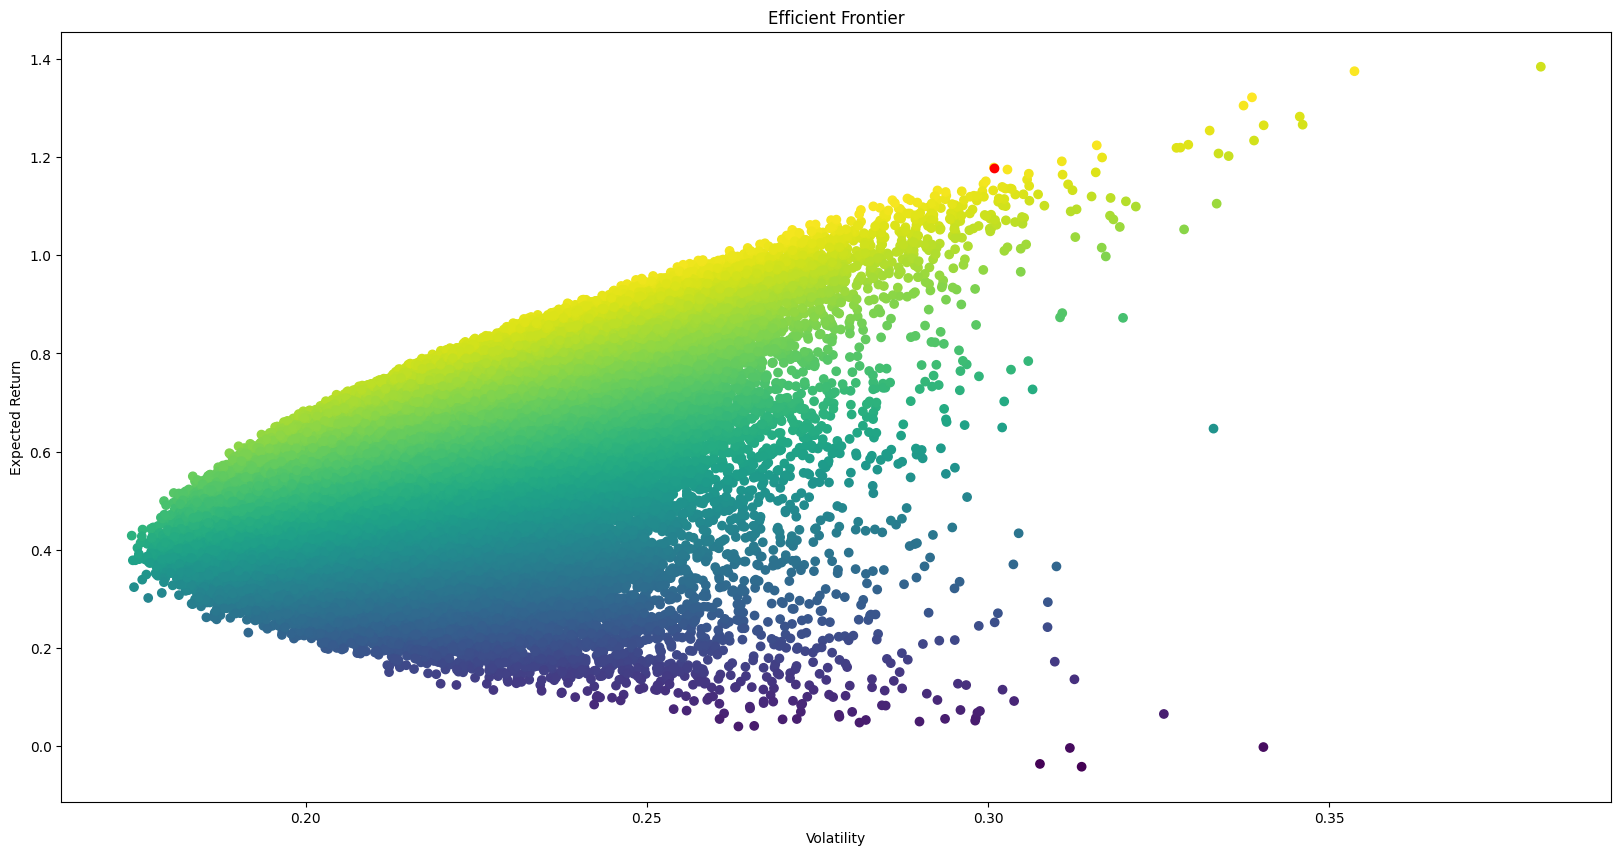

In [17]:
plt.figure(figsize=(20, 10))
plt.scatter(rand_SD_list, rand_return_list, c=rand_SR_list)

plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.title("Efficient Frontier")

plt.scatter(rand_SD_list[index], rand_return_list[index], c="red")
plt.show()